In [24]:
###############INTRODUCTION TO CLASSIFICATION##############

##Finding the distance between two points
import numpy as np

def Distance(p1, p2):
    
    """Measure of the distance between two points"""
    return np.sqrt(np.sum(np.power((p2 - p1),2)))


In [26]:
p1 = np.array([0, 0])
p2 = np.array([1, 1])
Distance(p1, p2)

1.4142135623730951

In [27]:
##Majority votes
import random
def majority_vote(votes):
    
    """
    Count votes and return the winner (One with majority of the votes)
    """    
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
            
            
    winners = []
    max_count = max(vote_count.values())
    for vote, count in vote_count.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

In [28]:
votes = [1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1]
winners = majority_vote(votes)
winners

3

In [82]:
##Short version of the code above

import scipy.stats as ss
    

     
def majority_vote_short(votes):
    """
    Return the most common element in a votes
    """
    votes = [1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3]
    mode, count  = ss.mstats.mode(votes)
    return mode

In [10]:
votes = [1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3]
majority_vote_short(votes)


array([3.])

[0.5, 3.5, 0.5, 3.5]

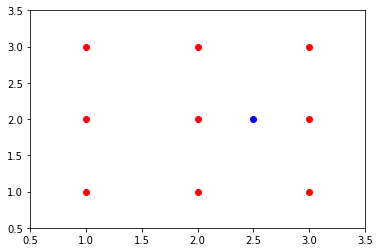

In [92]:
##Finding the nearest neighbors 

#Loop over all points
    #Compute the distance between point p and every other point
#sort distances and return those k points that are nearest to point p

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = Distance(p, points[i])

    ind = np.argsort(distances)# Sort the distances from smallest to largest
    return ind[:k]


points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])

In [52]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [53]:
points[4]

array([2, 2])

In [55]:
points[7]

array([3, 2])

In [54]:
distances[4]

0.5

In [12]:
#ind = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [93]:
def knn_predict(p, points, outcomes, k=5):
    
    #find k nearest neighbors 
    #predict the class of p based on majority vote
    
    ind = find_nearest_neighbors(p, points, k) 
    
    return majority_vote(outcomes[ind])

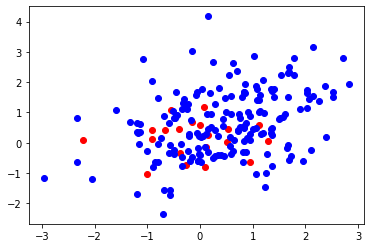

In [94]:
#Generating synthetic data

def generate_synthetic_data(n=50):
    
    """Create two sets of points from bivariate normal distribution""" 
    
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

points, outcomes = generate_synthetic_data(n=100)

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivardata.pdf")

In [95]:
##Making a prediction grid

def make_prediction_grid(predictors, outcomes, limits, h, k):
    
    """Classify each point on the prediction grid""" 
        
    (x_min, x_max, y_min, y_max)=limits
    xs=np.arange(x_min, x_max, h)
    ys=np.arange(y_min, y_max, h)
    
    xx, yy = np.meshgrid(xs, ys)
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x, y])
            prediction_grid[j, i]=knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)
   
    

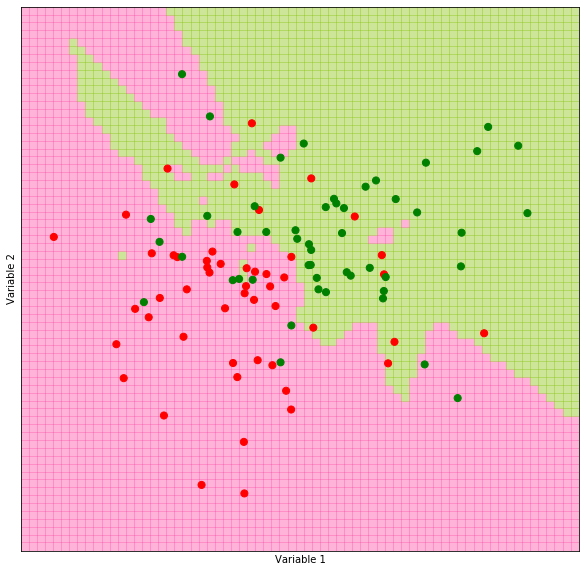

In [96]:
#Plotting the prediction grid


def plot_prediction_grid (xx, yy, prediction_grid, filename):
    
    """ Plot KNN predictions for every point on the grid."""
    
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    
(predictors, outcomes) = generate_synthetic_data()
k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1
(xx, yy, prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)

    
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [88]:
predictors.shape

(100, 2)

In [89]:
outcomes.shape

(100,)

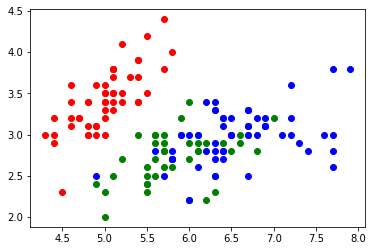

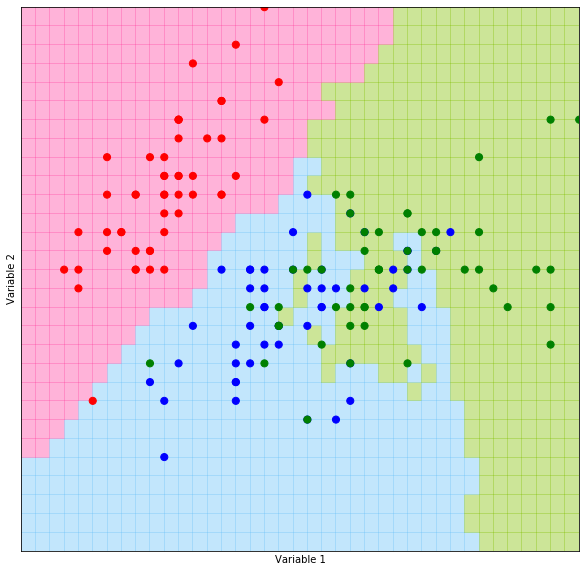

In [97]:
##Applying the KNN method

## apply the homemade kNN classifier to a real dataset
##Compare the performance of the homemade kNN classifier to the performance of the kNN classifier from the s
##cikit-learn module

from sklearn import datasets
iris = datasets.load_iris()

predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1
(xx, yy, prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)